In [1]:
import quanguru as qg

# 2 - How to create composite quantum systems

In this tutorial, we show various different ways you can create/define composite quantum systems in `QuanGuru`.

## Create each system then compose

This approach is probably the most natural and easy way. We discuss the alternatives below, and they are all just compact forms of this.

Let's start by creating a composite system with two qubits. We first create two `Qubit` instances and a `QuantumSystem` (for composite quantum system).
Without any sub-systems (stored in the `.subSys`) or operators assigned to it, the `QuantumSystem` instance is just an empty container. Therefore, we next add the sub-systems by calling `addSubSys` with a `list` containing the sub-systems we want to add. The order of sub-systems in the given `list` will determine the structure of Hilbert space as further explained below.

In [2]:
# create four qubits
qub1 = qg.Qubit()
qub2 = qg.Qubit()

# create a composite quantum systems
twoQub1 = qg.QuantumSystem()

# call the addSubSys with the list of qubits
twoQub1.addSubSys([qub2, qub1])

In above cell, we first created `qub1` then `qub2`. The order of creation as above does not have any special meaning other than the names of the `Qubit` objects, which will be named `Qubit1` and `Qubit2`, respectively.
When we add them as sub-systems to the composite quantum system `twoQub1`, we passed them in a list.
Their order in this list, however, determines the structures of the Hilbert space.
Below, we examine the structure of the Hilbert space from the composite operators (discussed below), but we can also examine it by using different information stored and used internally by `QuanGuru`.

Firstly, the sub-systems are stored in a `dictionary`, where the `key` is the sub-systems `name` and the `value` is just a reference to the subsystem object. This dictionary can be reached using the `subSys` attribute as below, and the order of the qubits should be consistent with the given list.

In [3]:
print(twoQub1.subSys)

{'Qubit2': <quanguru.classes.QSys.Qubit object at 0x1096be400>, 'Qubit1': <quanguru.classes.QSys.Qubit object at 0x108d17100>}


As expected, `Qubit2` is the first item of the `dictionary`.

When a quantum system is added as a sub-system to a composite system. The library stores/updates certain additional information relevant to the structure of the Hilbert space. Before moving on with the examples, let's explain what does *structure of the Hilbert space* mean?

Consider the following composite system Hamiltonian for two non-interacting qubits

$H = \frac{1}{2}\sigma_{z}\otimes1_{2,2} + \frac{1}{2}1_{2,2}\otimes\sigma_{z}$

where $\otimes$ is the outer/tensor product and $1_{2,2}$ is the 2-dimension identity operator. Here, $\sigma_{z}\otimes1_{2,2}$ and $1_{2,2}\otimes\sigma_{z}$ effect different portions of the Hilbert space corresponding to each qubit, and this what we mean by the *structure of the Hilbert space*.
The operators $\sigma_{z}\otimes1_{2,2}$ and $1_{2,2}\otimes\sigma_{z}$ are referred as composite operators, and we generally write such operators with a cleaner implicit notation as

$H = \frac{1}{2}\sigma_{z,1} + \frac{1}{2}\sigma_{z,2}$

and say that $\sigma_{z,1}$ ($\sigma_{z,2}$) operates on the first (second) qubit.
Also in `QuanGuru`, we want such information to be implicit to have cleaner code, and the library manages the details internally.
The first (second) qubit of our composite system are, therefore, (from left-to-right) first and second items of the list, `qub2` and `qub1`. In this case, this order is our choice and is independent of the order in which the `Qubit` objects are created.

In the above Hamiltonian, the total dimension *after* the first qubit is 2 (the dimension of the second qubit), and the total dimension *before* the second qubit is 2 (the dimension of the first qubit). In order to be able to create composite operators, our `Qubit` objects need these information, and it is stored in `_dimsAfter` and `_dimsBefore` attributes. `QuanGuru` manages these values, therefore `_dimsAfter` and `_dimsBefore` attributes should not be modified by the user. The default values (i.e. when the system is not in composite or no system before/after) for these attributes is 1, which is interpreted as a 1-dimensional identity, i.e. scaler 1 that does not change anything for the operator.

Now, let's print `_dimsAfter` and `_dimsBefore` for both of the qubits and verify.

In [4]:
print(qub1._dimsBefore, qub1._dimsAfter)
print(qub2._dimsBefore, qub2._dimsAfter)

2 1
1 2


These `_dimsAfter` and `_dimsBefore` values are used internally to create composite operators. Since, according to our convention, the `qub2` is the first sub-system of the composite system, its composite operator should be

$\sigma_{z}\otimes1 = \left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & -1 \end{array}\right]$

and the composite operator of the `qub1` should be 

$\sigma_{z}\otimes1 = \left[\begin{array}{llll}1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & -1 \end{array}\right]$

Let's print and verify. But, recall from the previous tutorials that `Qubit` objects use the two dimensional $J_{z}$ to incorporate the $\frac{1}{2}$ factor of the Hamiltonian, so the values will be half.

In [5]:
# freeMat is just the (composite) operator of the system
print(qub2.freeMat.A)
print(qub1.freeMat.A)

[[ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.  -0.5]]
[[ 0.5  0.   0.   0. ]
 [ 0.  -0.5  0.   0. ]
 [ 0.   0.   0.5  0. ]
 [ 0.   0.   0.  -0.5]]


## Create a composite quantum system using the $+$ operator

Above examples highlight the basics of composite quantum systems, and we now focus on alternative ways for composite system creation. We will take an incremental approach and simplify the above composite system creation step-by-step.
First step is that we actually don't have to create a composite system first then add the sub-systems, we can do them in a single line as below.

In [6]:
qub3 = qg.Qubit()
qub4 = qg.Qubit()

twoQub2 = qg.QuantumSystem(subSys=[qub3, qub4])

print(twoQub2.subSys)
print(qub3._dimsBefore, qub3._dimsAfter)
print(qub4._dimsBefore, qub4._dimsAfter)
print(qub3.freeMat.A)
print(qub4.freeMat.A)

{'Qubit3': <quanguru.classes.QSys.Qubit object at 0x1096be740>, 'Qubit4': <quanguru.classes.QSys.Qubit object at 0x1096be810>}
1 2
2 1
[[ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.  -0.5]]
[[ 0.5  0.   0.   0. ]
 [ 0.  -0.5  0.   0. ]
 [ 0.   0.   0.5  0. ]
 [ 0.   0.   0.  -0.5]]


It is shorter than the previous code but not much cleaner, and we can do better. We can use the $+$ operator as below

In [7]:
qub5 = qg.Qubit()
qub6 = qg.Qubit()

twoQub3 = qub6 + qub5

print(twoQub3.subSys)
print(qub6._dimsBefore, qub6._dimsAfter)
print(qub5._dimsBefore, qub5._dimsAfter)
print(qub6.freeMat.A)
print(qub5.freeMat.A)

{'Qubit6': <quanguru.classes.QSys.Qubit object at 0x1096be9b0>, 'Qubit5': <quanguru.classes.QSys.Qubit object at 0x1096be8e0>}
1 2
2 1
[[ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.  -0.5]]
[[ 0.5  0.   0.   0. ]
 [ 0.  -0.5  0.   0. ]
 [ 0.   0.   0.5  0. ]
 [ 0.   0.   0.  -0.5]]


In this notation, the order of the sub-system is again from left-to-right as in the `list` provided to `addSubSys`.

Now, it might be obvious that we can reduce all of this into a single line as follows

In [8]:
twoQub4 = qg.Qubit() + qg.Qubit()
print(twoQub4.subSys)

{'Qubit7': <quanguru.classes.QSys.Qubit object at 0x1096beb50>, 'Qubit8': <quanguru.classes.QSys.Qubit object at 0x1096bec20>}


This short-hand is quite useful and clean, and notice that, in this case, the order of the sub-systems will match their creation order. But, the problem is that we now don't have any explicit references to our sub-systems, `Qubit7` and `Qubit8`, if we need them. Here, we want to print the `_dimsBefore` and `_dimsAfter` and `freeMat`, and knowing the name of our quantum systems and the fact that they are stored in the `subSys` dictionary, we can achieve this as below

In [9]:
qub7 = twoQub4.subSys['Qubit7']
qub8 = twoQub4.subSys['Qubit8']

print(qub7._dimsBefore, qub7._dimsAfter)
print(qub8._dimsBefore, qub8._dimsAfter)
print(qub7.freeMat.A)
print(qub8.freeMat.A)

1 2
2 1
[[ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.  -0.5  0. ]
 [ 0.   0.   0.  -0.5]]
[[ 0.5  0.   0.   0. ]
 [ 0.  -0.5  0.   0. ]
 [ 0.   0.   0.5  0. ]
 [ 0.   0.   0.  -0.5]]


This obviously is not a cleaner approach, if we need explicit references to our objects. But, we generally don't need it, and all the functionalities of `QuanGuru` accepts the object `name`(or any of its `alias`) instead of a reference. We will cover such examples in future, but this basically means that we will need this explicit references in extreme cases.

## Create a composite quantum system using the $*$ operator

If we want to create a quantum system with $n$ identical copies of a sub-system, we don't necessarily want to type all that $n$ times even if we are simply summing them. In such cases, we can use the $*$ operator as follows

In [10]:
fourQubit = 4*qg.Qubit(frequency=0.2)

print(fourQubit.subSys)

{'Qubit9': <quanguru.classes.QSys.Qubit object at 0x1096becf0>, 'Qubit10': <quanguru.classes.QSys.Qubit object at 0x1096bedc0>, 'Qubit11': <quanguru.classes.QSys.Qubit object at 0x1096bee90>, 'Qubit12': <quanguru.classes.QSys.Qubit object at 0x1096bef60>}


## $+$ operator on composite system

We can use $+$ operators with composite quantum systems in two different ways.

### Adding single system to an existing composite system with $+$ operator

When we use $+$ operator between a single system and a composite system, it adds the single system into the composite system. Let's add more qubits to our `fourQubit` system.

In [11]:
# this notation will be intuitive to most
# it is equivalent to fourQubit = fourQubit + qg.Qubit(frequency=1)
# and it justs add another qubits to our fourQubit system
fourQubit += qg.Qubit(frequency=1)

print(fourQubit.subSys)

{'Qubit9': <quanguru.classes.QSys.Qubit object at 0x1096becf0>, 'Qubit10': <quanguru.classes.QSys.Qubit object at 0x1096bedc0>, 'Qubit11': <quanguru.classes.QSys.Qubit object at 0x1096bee90>, 'Qubit12': <quanguru.classes.QSys.Qubit object at 0x1096bef60>, 'Qubit13': <quanguru.classes.QSys.Qubit object at 0x1096bea80>}


In [12]:
# add another to demonstrate alternative form of above
fourQubit = fourQubit + qg.Qubit(frequency=2)
print(fourQubit.subSys)

for s in fourQubit.subSys.values():
    print(s.frequency)

{'Qubit9': <quanguru.classes.QSys.Qubit object at 0x1096becf0>, 'Qubit10': <quanguru.classes.QSys.Qubit object at 0x1096bedc0>, 'Qubit11': <quanguru.classes.QSys.Qubit object at 0x1096bee90>, 'Qubit12': <quanguru.classes.QSys.Qubit object at 0x1096bef60>, 'Qubit13': <quanguru.classes.QSys.Qubit object at 0x1096bea80>, 'Qubit14': <quanguru.classes.QSys.Qubit object at 0x1096bf030>}
0.2
0.2
0.2
0.2
1
2


### Combining composite system with $+$ operator

We can use $+$ operator to combine two composite systems. This means that it creates a third composite system, whose sub-systems are the composite quantum systems which have their own sub-systems that can be single or composite systems, i.e. nested-composite-systems.

In [13]:
# create a composite system of 4 qubits
# first two of these are identical and have frequency=0.1
# next two of these are identical and have frequency=0.2
# we can achieve this simply by
fourQubit2 = 2*qg.Qubit(frequency=0.1) + 2*qg.Qubit(frequency=0.2)

print(fourQubit2.subSys)

{'QuantumSystem6': <quanguru.classes.QSys.compQSystem object at 0x1091d5a80>, 'QuantumSystem7': <quanguru.classes.QSys.compQSystem object at 0x1091d5620>}


In [14]:
print(fourQubit2.subSys['QuantumSystem6'].subSys)
print(fourQubit2.subSys['QuantumSystem7'].subSys)

{'Qubit15': <quanguru.classes.QSys.Qubit object at 0x1096bf100>, 'Qubit16': <quanguru.classes.QSys.Qubit object at 0x1096bf1d0>}
{'Qubit17': <quanguru.classes.QSys.Qubit object at 0x1096bf2a0>, 'Qubit18': <quanguru.classes.QSys.Qubit object at 0x1096bf370>}


Notice that, in this case, our composite quantum system `fourQubit2` has two sub-systems that are themselves composite systems. This because `2*qg.Qubit()` creates a composite system, meaning that we add two composite systems to create `fourQubit2`.

`QuanGuru` manages all the relevant information about the dimensions for us, and let's verify these.

In [15]:
print(fourQubit2.dimension)
for compSys in fourQubit2.subSys.values():
    print('\t', compSys.dimension, compSys._dimsBefore, compSys._dimsAfter)
    for subs in compSys.subSys.values():
        print('\t\t', subs.dimension, subs._dimsBefore, subs._dimsAfter)

16
	 4 1 4
		 2 1 8
		 2 2 4
	 4 4 1
		 2 4 2
		 2 8 1


## How to remove a sub-system ?

Now, what if we want to remove a sub-system ? This is where the `name` attribute comes extremely handy, because, in order to remove `Qubit15` from `fourQubit2`, all we need to do is

In [16]:
fourQubit2 - 'Qubit17'

# the Qubit17 will be removed
print(fourQubit2.subSys)
print(fourQubit2.subSys['QuantumSystem6'].subSys)
print(fourQubit2.subSys['QuantumSystem7'].subSys)

# and all the dimension information are updated accordingly
print(fourQubit2.dimension)
for compSys in fourQubit2.subSys.values():
    print('\t', compSys.dimension, compSys._dimsBefore, compSys._dimsAfter)
    for subs in compSys.subSys.values():
        print('\t\t', subs.dimension, subs._dimsBefore, subs._dimsAfter)

{'QuantumSystem6': <quanguru.classes.QSys.compQSystem object at 0x1091d5a80>, 'QuantumSystem7': <quanguru.classes.QSys.compQSystem object at 0x1091d5620>}
{'Qubit15': <quanguru.classes.QSys.Qubit object at 0x1096bf100>, 'Qubit16': <quanguru.classes.QSys.Qubit object at 0x1096bf1d0>}
{'Qubit18': <quanguru.classes.QSys.Qubit object at 0x1096bf370>}
8
	 4 1 2
		 2 1 4
		 2 2 2
	 2 4 1
		 2 4 1


In [17]:
# THIS IS A DUMMY PLOT FOR THE THUMBNAIL IN DOCUMENTATION WEBSITE# you can of course remove the composite system
fourQubit2 - 'QuantumSystem6'

# the QuantumSystem6 will be removed
print(fourQubit2.subSys)
#print(fourQubit2.subSys['QuantumSystem6'].subSys)
print(fourQubit2.subSys['QuantumSystem7'].subSys)

# and all the dimension information are updated accordingly
print(fourQubit2.dimension)
for compSys in fourQubit2.subSys.values():
    print('\t', compSys.dimension, compSys._dimsBefore, compSys._dimsAfter)
    for subs in compSys.subSys.values():
        print('\t\t', subs.dimension, subs._dimsBefore, subs._dimsAfter)

{'QuantumSystem7': <quanguru.classes.QSys.compQSystem object at 0x1091d5620>}
{'Qubit18': <quanguru.classes.QSys.Qubit object at 0x1096bf370>}
2
	 2 1 1
		 2 1 1


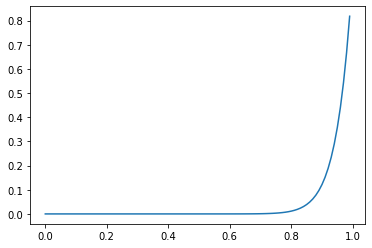

In [18]:
# THIS IS A DUMMY PLOT FOR THE THUMBNAIL IN DOCUMENTATION WEBSITE

import matplotlib.pyplot as plt
plt.plot([i/100 for i in range(100)], [(i/100)**20 for i in range(100)])